# Task - 2 : GRIPMAY21 @ The Sparks Foundation

## PREDICTION USING UNSUPERVISED ML

## Problem Statement
From the given 'Iris' dataset,predict the optimum number of clusters and represent it visually.

## Dataset Used-https://bit.ly/3kXTdox

## Created By- Rashmi Bhogendra Raut, Data Science and Business Analytics Intern

## Analyzing the Data

## Step 1- Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Import Dataset

In [2]:
iris=pd.read_csv('Iris.csv')
print("data imported")

data imported


## Step 3 - Data Cleaning

In [3]:
# to checktop 10 rows of dataframe
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# to check the number of rows and column in given dataset
iris.shape

(150, 6)

In [5]:
# to describe the numerical data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# to check the size of dataset
iris.size

900

In [7]:
# to check concise summary of dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# check data correlaation coefficient
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Step 4 - Check Na value and dtype of each column

In [9]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# to check the duplicate values
iris.duplicated().sum()

0

## Step 5 - Data Preparation

In [11]:
# to drop the id column from given dataset
iris=iris.drop(["Id"],axis=1)      # axis=1 => column
                                   # axis=0 => rows

In [12]:
# to check Id is drop from datset or not
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
# from unique categorical data
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

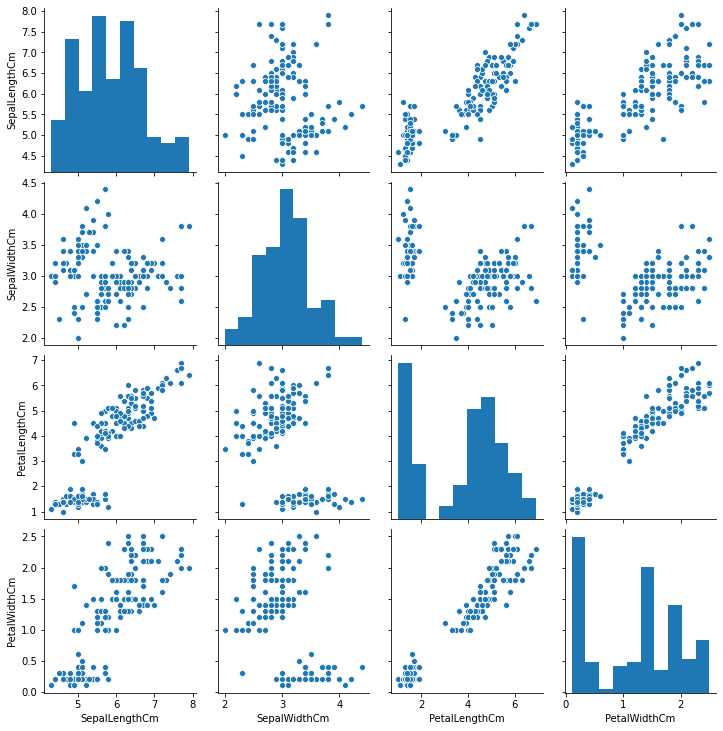

In [14]:
#plotting multiverate plots
#plot the pairwise plot of multiple features/variable in a grid format
sns.pairplot(data = iris)

both sepal length and sepal width have a normal (Gaussian) distribution. However, the length of petals is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5

## Pre-processing standardization

It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

## Step 6 - Model Building

In [21]:
# Scaling the data before clustering =>pre-processing standardization
x = iris.iloc[:,:4]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
#scaling the features with standard scaler
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()

# fitting 
stdsc.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
x_stdsc_std= stdsc.transform(x)

we can also use fit_transform() method rather than using fit() and predict() seperately

In [24]:
x_stdsc_std_df=pd.DataFrame(x_stdsc_std, columns=x.columns)

In [25]:
# data after scaling
x_stdsc_std_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## Step 7 - Finding optimum no. of clusters for KMeans clustering Using elbow method

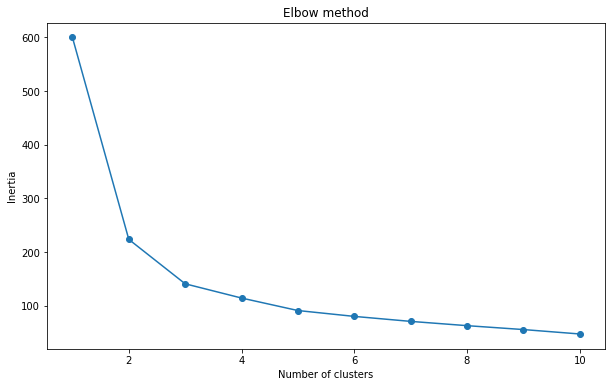

In [26]:
# calculate distortion for a range of number of cluster
from sklearn.cluster import KMeans

inertia = []  ##sum of squares of distance from the center of cluster(centroids)
for i in np.arange(1, 11):
    km = KMeans(init = 'k-means++', n_clusters=i , n_init = 10 , random_state =0)
    km.fit(x_stdsc_std)
    inertia.append(km.inertia_)

# plot inertia for different values of k
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As the plot shows, the inertia decreases as the number of clusters increases. The optimal k should be where the inertia no longer decreases as rapidly.

For example, k=3 seems to be optimal, as we increase the number of clusters from 2 to 3, the decrease in inertia slows down significantly, compared to that from 1 to 2.

## Step 8 - Perform Kmeans clustering with K=3


In [27]:
#instantiating 
kmeans = KMeans(init = 'k-means++', n_clusters=3 , n_init = 10 , random_state =0) 

#fitting and predicting 
y_kmeans = kmeans.fit_predict(x_stdsc_std)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [28]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

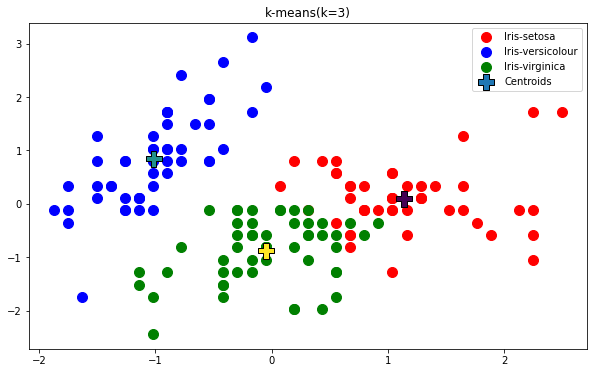

In [29]:
#plot the scaled data
plt.figure(figsize=(10,6))

plt.scatter(x_stdsc_std[y_kmeans == 0, 0], x_stdsc_std[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_stdsc_std[y_kmeans == 1, 0], x_stdsc_std[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x_stdsc_std[y_kmeans == 2, 0], x_stdsc_std[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#identifying centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = 'P' , s=250 , c=[0,1,2] , edgecolors = 'k', label = 'Centroids')
plt.legend()
plt.title('k-means(k=3)')
plt.show()

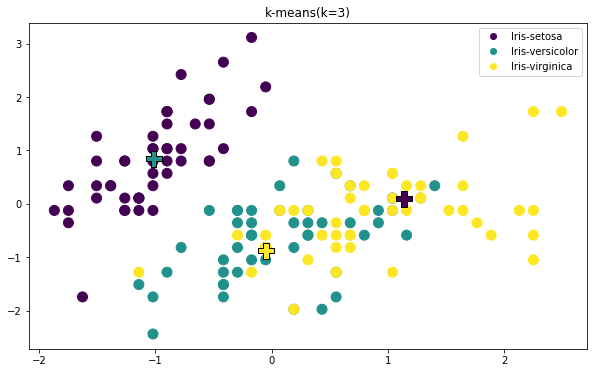

In [30]:
#plot the scaled data
plt.figure(figsize=(10,6))
name_dict = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica' : 2}
colors = [name_dict[item] for item in iris['Species']]
s = plt.scatter(x_stdsc_std[:,0],x_stdsc_std[:,1],c=colors , s=100)

#identifying centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = 'P' , s=250 , c=[0,1,2] , edgecolors = 'k', label = 'Centroids')
plt.legend(handles = s.legend_elements()[0] , labels = name_dict.keys())

plt.title('k-means(k=3)')
plt.show()

## Analysis done !